## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9791873	total: 58.7ms	remaining: 58.6s
1:	learn: 0.9588504	total: 59.8ms	remaining: 29.8s
2:	learn: 0.9395090	total: 61.1ms	remaining: 20.3s
3:	learn: 0.9228451	total: 62.1ms	remaining: 15.5s
4:	learn: 0.9038088	total: 63ms	remaining: 12.5s
5:	learn: 0.8870254	total: 64ms	remaining: 10.6s
6:	learn: 0.8701348	total: 65ms	remaining: 9.22s
7:	learn: 0.8542939	total: 65.9ms	remaining: 8.17s
8:	learn: 0.8386971	total: 66.9ms	remaining: 7.37s
9:	learn: 0.8237334	total: 67.9ms	remaining: 6.72s
10:	learn: 0.8083533	total: 68.8ms	remaining: 6.18s
11:	learn: 0.7929352	total: 69.6ms	remaining: 5.73s
12:	learn: 0.7785497	total: 70.4ms	remaining: 5.34s
13:	learn: 0.7632427	total: 71.3ms	remaining: 5.02s
14:	learn: 0.7489940	total: 72.1ms	remaining: 4.74s
15:	learn: 0.7359234	total: 73ms	remaining: 4.49s
16:	learn: 0.7229764	total: 73.9ms	remaining: 4.27s
17:	learn: 0.7111397	total: 74.7ms	remaining: 4.08s
18:	learn: 0.6991945	total: 75.5ms	remaining: 3.9s
1

55:	learn: 0.4314416	total: 106ms	remaining: 1.78s
56:	learn: 0.4280477	total: 107ms	remaining: 1.77s
57:	learn: 0.4236722	total: 108ms	remaining: 1.75s
58:	learn: 0.4195658	total: 108ms	remaining: 1.73s
59:	learn: 0.4152201	total: 109ms	remaining: 1.71s
60:	learn: 0.4113286	total: 110ms	remaining: 1.69s
61:	learn: 0.4078950	total: 111ms	remaining: 1.68s
62:	learn: 0.4046151	total: 112ms	remaining: 1.66s
63:	learn: 0.4005856	total: 113ms	remaining: 1.65s
64:	learn: 0.3972971	total: 113ms	remaining: 1.63s
65:	learn: 0.3935810	total: 115ms	remaining: 1.62s
66:	learn: 0.3904051	total: 116ms	remaining: 1.61s
67:	learn: 0.3869936	total: 116ms	remaining: 1.59s
68:	learn: 0.3843312	total: 117ms	remaining: 1.58s
69:	learn: 0.3818559	total: 118ms	remaining: 1.57s
70:	learn: 0.3791994	total: 119ms	remaining: 1.55s
71:	learn: 0.3759113	total: 120ms	remaining: 1.54s
72:	learn: 0.3736509	total: 121ms	remaining: 1.53s
73:	learn: 0.3707640	total: 122ms	remaining: 1.52s
74:	learn: 0.3672376	total: 122

152:	learn: 0.2552371	total: 191ms	remaining: 1.06s
153:	learn: 0.2546422	total: 192ms	remaining: 1.05s
154:	learn: 0.2540719	total: 193ms	remaining: 1.05s
155:	learn: 0.2533198	total: 194ms	remaining: 1.05s
156:	learn: 0.2525864	total: 195ms	remaining: 1.04s
157:	learn: 0.2521079	total: 195ms	remaining: 1.04s
158:	learn: 0.2512276	total: 196ms	remaining: 1.04s
159:	learn: 0.2507634	total: 197ms	remaining: 1.03s
160:	learn: 0.2497328	total: 198ms	remaining: 1.03s
161:	learn: 0.2491662	total: 198ms	remaining: 1.03s
162:	learn: 0.2488230	total: 199ms	remaining: 1.02s
163:	learn: 0.2482137	total: 200ms	remaining: 1.02s
164:	learn: 0.2477840	total: 201ms	remaining: 1.02s
165:	learn: 0.2468083	total: 202ms	remaining: 1.01s
166:	learn: 0.2461863	total: 203ms	remaining: 1.01s
167:	learn: 0.2454674	total: 203ms	remaining: 1.01s
168:	learn: 0.2447162	total: 204ms	remaining: 1s
169:	learn: 0.2440920	total: 205ms	remaining: 1s
170:	learn: 0.2435376	total: 206ms	remaining: 998ms
171:	learn: 0.2425

277:	learn: 0.1825718	total: 296ms	remaining: 769ms
278:	learn: 0.1820974	total: 297ms	remaining: 767ms
279:	learn: 0.1817588	total: 298ms	remaining: 765ms
280:	learn: 0.1812500	total: 299ms	remaining: 764ms
281:	learn: 0.1808049	total: 299ms	remaining: 762ms
282:	learn: 0.1804367	total: 300ms	remaining: 761ms
283:	learn: 0.1798698	total: 301ms	remaining: 759ms
284:	learn: 0.1793198	total: 302ms	remaining: 758ms
285:	learn: 0.1788440	total: 303ms	remaining: 756ms
286:	learn: 0.1784999	total: 304ms	remaining: 755ms
287:	learn: 0.1779931	total: 305ms	remaining: 753ms
288:	learn: 0.1775223	total: 306ms	remaining: 752ms
289:	learn: 0.1772721	total: 306ms	remaining: 750ms
290:	learn: 0.1767028	total: 307ms	remaining: 748ms
291:	learn: 0.1763251	total: 308ms	remaining: 747ms
292:	learn: 0.1759972	total: 309ms	remaining: 745ms
293:	learn: 0.1756500	total: 310ms	remaining: 744ms
294:	learn: 0.1752002	total: 311ms	remaining: 742ms
295:	learn: 0.1746937	total: 311ms	remaining: 741ms
296:	learn: 

379:	learn: 0.1450839	total: 382ms	remaining: 623ms
380:	learn: 0.1448425	total: 383ms	remaining: 622ms
381:	learn: 0.1445114	total: 383ms	remaining: 620ms
382:	learn: 0.1444007	total: 384ms	remaining: 619ms
383:	learn: 0.1441566	total: 385ms	remaining: 618ms
384:	learn: 0.1438517	total: 386ms	remaining: 616ms
385:	learn: 0.1435206	total: 387ms	remaining: 615ms
386:	learn: 0.1432857	total: 388ms	remaining: 614ms
387:	learn: 0.1429786	total: 389ms	remaining: 613ms
388:	learn: 0.1427323	total: 389ms	remaining: 611ms
389:	learn: 0.1426266	total: 390ms	remaining: 610ms
390:	learn: 0.1423546	total: 391ms	remaining: 609ms
391:	learn: 0.1420968	total: 392ms	remaining: 607ms
392:	learn: 0.1418725	total: 392ms	remaining: 606ms
393:	learn: 0.1415636	total: 393ms	remaining: 605ms
394:	learn: 0.1414106	total: 394ms	remaining: 604ms
395:	learn: 0.1412579	total: 395ms	remaining: 602ms
396:	learn: 0.1410462	total: 396ms	remaining: 601ms
397:	learn: 0.1408876	total: 397ms	remaining: 600ms
398:	learn: 

506:	learn: 0.1174911	total: 486ms	remaining: 473ms
507:	learn: 0.1173070	total: 487ms	remaining: 472ms
508:	learn: 0.1171095	total: 488ms	remaining: 471ms
509:	learn: 0.1170196	total: 489ms	remaining: 470ms
510:	learn: 0.1167483	total: 490ms	remaining: 469ms
511:	learn: 0.1165964	total: 491ms	remaining: 468ms
512:	learn: 0.1164691	total: 492ms	remaining: 467ms
513:	learn: 0.1162254	total: 492ms	remaining: 465ms
514:	learn: 0.1159685	total: 493ms	remaining: 464ms
515:	learn: 0.1157404	total: 494ms	remaining: 463ms
516:	learn: 0.1156415	total: 495ms	remaining: 462ms
517:	learn: 0.1154515	total: 495ms	remaining: 461ms
518:	learn: 0.1152281	total: 496ms	remaining: 460ms
519:	learn: 0.1149687	total: 497ms	remaining: 459ms
520:	learn: 0.1148112	total: 498ms	remaining: 458ms
521:	learn: 0.1145308	total: 499ms	remaining: 457ms
522:	learn: 0.1143556	total: 500ms	remaining: 456ms
523:	learn: 0.1141190	total: 500ms	remaining: 454ms
524:	learn: 0.1139937	total: 501ms	remaining: 454ms
525:	learn: 

608:	learn: 0.1005123	total: 572ms	remaining: 367ms
609:	learn: 0.1003380	total: 573ms	remaining: 366ms
610:	learn: 0.1002328	total: 574ms	remaining: 365ms
611:	learn: 0.1000039	total: 574ms	remaining: 364ms
612:	learn: 0.0999045	total: 575ms	remaining: 363ms
613:	learn: 0.0997380	total: 576ms	remaining: 362ms
614:	learn: 0.0994966	total: 577ms	remaining: 361ms
615:	learn: 0.0993483	total: 578ms	remaining: 360ms
616:	learn: 0.0992105	total: 579ms	remaining: 359ms
617:	learn: 0.0990922	total: 580ms	remaining: 358ms
618:	learn: 0.0990751	total: 581ms	remaining: 357ms
619:	learn: 0.0988736	total: 581ms	remaining: 356ms
620:	learn: 0.0988230	total: 582ms	remaining: 355ms
621:	learn: 0.0988005	total: 583ms	remaining: 354ms
622:	learn: 0.0986281	total: 584ms	remaining: 353ms
623:	learn: 0.0985319	total: 585ms	remaining: 352ms
624:	learn: 0.0983954	total: 585ms	remaining: 351ms
625:	learn: 0.0982265	total: 586ms	remaining: 350ms
626:	learn: 0.0980077	total: 587ms	remaining: 349ms
627:	learn: 

732:	learn: 0.0853638	total: 677ms	remaining: 246ms
733:	learn: 0.0853209	total: 677ms	remaining: 246ms
734:	learn: 0.0851087	total: 678ms	remaining: 245ms
735:	learn: 0.0849639	total: 679ms	remaining: 244ms
736:	learn: 0.0848190	total: 680ms	remaining: 243ms
737:	learn: 0.0846894	total: 681ms	remaining: 242ms
738:	learn: 0.0844657	total: 682ms	remaining: 241ms
739:	learn: 0.0842737	total: 683ms	remaining: 240ms
740:	learn: 0.0842351	total: 684ms	remaining: 239ms
741:	learn: 0.0840718	total: 684ms	remaining: 238ms
742:	learn: 0.0840569	total: 685ms	remaining: 237ms
743:	learn: 0.0839117	total: 686ms	remaining: 236ms
744:	learn: 0.0838047	total: 687ms	remaining: 235ms
745:	learn: 0.0837500	total: 688ms	remaining: 234ms
746:	learn: 0.0835613	total: 689ms	remaining: 233ms
747:	learn: 0.0834339	total: 690ms	remaining: 232ms
748:	learn: 0.0832774	total: 690ms	remaining: 231ms
749:	learn: 0.0830740	total: 691ms	remaining: 230ms
750:	learn: 0.0830112	total: 692ms	remaining: 229ms
751:	learn: 

832:	learn: 0.0745727	total: 762ms	remaining: 153ms
833:	learn: 0.0744782	total: 763ms	remaining: 152ms
834:	learn: 0.0744618	total: 764ms	remaining: 151ms
835:	learn: 0.0743255	total: 764ms	remaining: 150ms
836:	learn: 0.0742263	total: 765ms	remaining: 149ms
837:	learn: 0.0741779	total: 766ms	remaining: 148ms
838:	learn: 0.0739501	total: 767ms	remaining: 147ms
839:	learn: 0.0738976	total: 768ms	remaining: 146ms
840:	learn: 0.0737180	total: 768ms	remaining: 145ms
841:	learn: 0.0736817	total: 769ms	remaining: 144ms
842:	learn: 0.0735949	total: 770ms	remaining: 143ms
843:	learn: 0.0735405	total: 771ms	remaining: 142ms
844:	learn: 0.0733821	total: 772ms	remaining: 142ms
845:	learn: 0.0732485	total: 773ms	remaining: 141ms
846:	learn: 0.0732161	total: 774ms	remaining: 140ms
847:	learn: 0.0731434	total: 775ms	remaining: 139ms
848:	learn: 0.0730142	total: 776ms	remaining: 138ms
849:	learn: 0.0729301	total: 776ms	remaining: 137ms
850:	learn: 0.0728575	total: 777ms	remaining: 136ms
851:	learn: 

958:	learn: 0.0633875	total: 867ms	remaining: 37ms
959:	learn: 0.0632874	total: 867ms	remaining: 36.1ms
960:	learn: 0.0632435	total: 868ms	remaining: 35.2ms
961:	learn: 0.0632235	total: 869ms	remaining: 34.3ms
962:	learn: 0.0631541	total: 870ms	remaining: 33.4ms
963:	learn: 0.0630929	total: 871ms	remaining: 32.5ms
964:	learn: 0.0630691	total: 872ms	remaining: 31.6ms
965:	learn: 0.0630573	total: 873ms	remaining: 30.7ms
966:	learn: 0.0629426	total: 873ms	remaining: 29.8ms
967:	learn: 0.0628136	total: 874ms	remaining: 28.9ms
968:	learn: 0.0627224	total: 875ms	remaining: 28ms
969:	learn: 0.0626517	total: 876ms	remaining: 27.1ms
970:	learn: 0.0625313	total: 877ms	remaining: 26.2ms
971:	learn: 0.0625187	total: 877ms	remaining: 25.3ms
972:	learn: 0.0624336	total: 878ms	remaining: 24.4ms
973:	learn: 0.0623906	total: 879ms	remaining: 23.5ms
974:	learn: 0.0623027	total: 880ms	remaining: 22.6ms
975:	learn: 0.0622623	total: 881ms	remaining: 21.7ms
976:	learn: 0.0621559	total: 881ms	remaining: 20.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

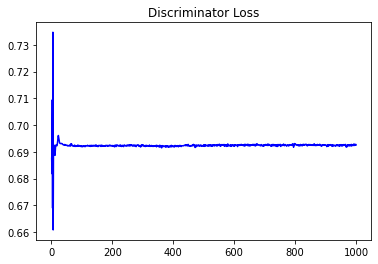

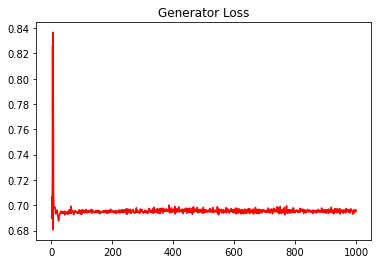

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.14168919273074018


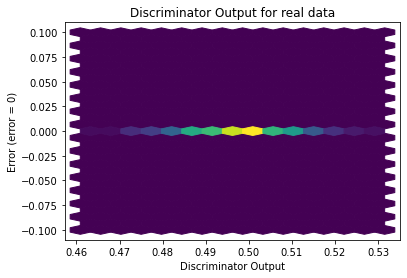

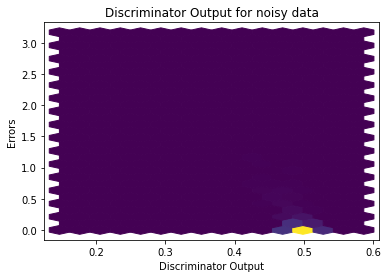

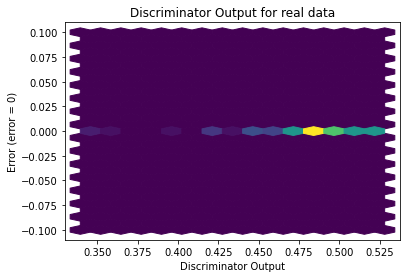

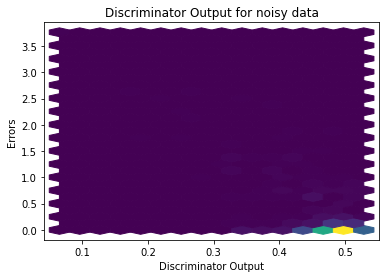

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


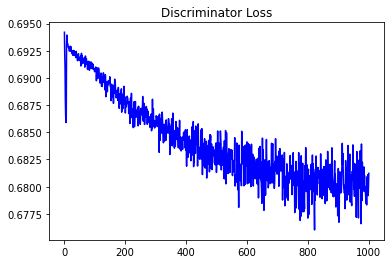

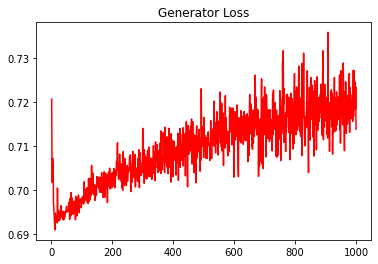

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.11515186663097671


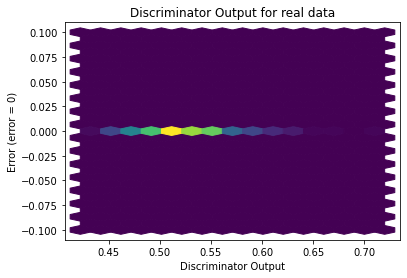

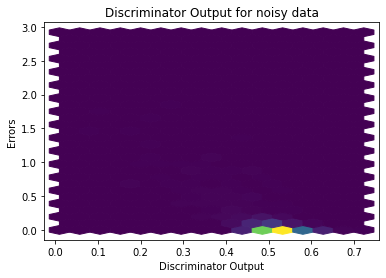

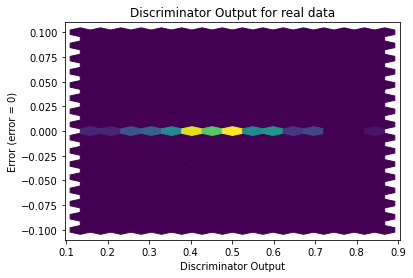

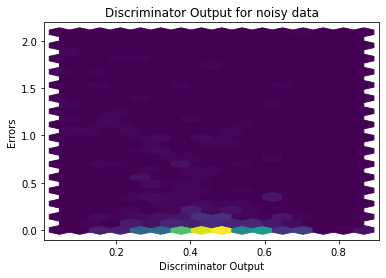

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5890]], requires_grad=True)
